### Issue referente à feature

Issue: [#249](https://github.com/lappis-unb/salic-ml/issues/249)

### Introdução

Este notebook tem como intuito utilizar a planilha_comprovacao para caracterizar os itens orçamentários de acordo com o seus comprovantes de pagamento.
Explora-se os comprovantes em duas principais características: 
 - Qual o tipo de pagamento (Transferência Bancária, Cheque ou Saque/Dinheiro.
 - E se existe mais de um item orçamentário para cada comprovante


In [1]:
from salicml.data import data
df = data.planilha_comprovacao

Interpretou-se que o campo 'idComprovantePagamento' é único para cada comprovante, porém pode ser duplicado para diferentes itens orçamentários, o que pode aumentar a complexidade de análise financeira daquele projeto. O campo 'tpFormaDePagamento' parece ser o tipo de pagamento (Transferência Bancária, Cheque ou Saque/Dinheiro) porém apresenta como um inteiro e não se sabe ao certo qual seria qual.

In [2]:
df.head()

,IdPRONAC,PRONAC,DataProjeto,idPlanilhaAprovacao,idPlanilhaItem,Item,idSegmento,vlComprovacao,idComprovantePagamento,nrCNPJCPF,nmFornecedor,UF,cdProduto,cdCidade,cdEtapa,proponenteCgcCpf,tpFormaDePagamento
0,209702,171436,2017-05-16 21:55:49.903,2407740,3684,Locação de equipamentos,33,484.85,393661,88847082000155,PREFEITURA MUNICIPAL DE GRAMADO,43,18,430910,2,09322179000178,2.0
1,203599,161921,2016-06-03 11:48:07.223,2186159,3738,Coordenação de Audio-Visual,11,200.00,206716,88847082000155,PREFEITURA MUNICIPAL DE GRAMADO,43,18,430910,2,09322179000178,2.0
2,209702,171436,2017-05-16 21:55:49.903,2407730,1031,Projeto cenográfico,33,303.59,393662,88847082000155,PREFEITURA MUNICIPAL DE GRAMADO,43,18,430910,2,09322179000178,2.0
3,203599,161921,2016-06-03 11:48:07.223,2186111,1116,Locação equipamento de som,11,12325.25,206746,88847082000155,PREFEITURA MUNICIPAL DE GRAMADO,43,18,430910,2,09322179000178,2.0
4,203599,161921,2016-06-03 11:48:07.223,2186111,1116,Locação equipamento de som,11,280.00,206748,88847082000155,PREFEITURA MUNICIPAL DE GRAMADO,43,18,430910,2,09322179000178,2.0


Observou-se que todos os campos estão preenchidos com objetos não nulos, exceto o tpFormaDePagamento que possui 657 valores nulos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355664 entries, 0 to 355663
Data columns (total 17 columns):
IdPRONAC                  355664 non-null int64
PRONAC                    355664 non-null object
DataProjeto               355664 non-null datetime64[ns]
idPlanilhaAprovacao       355664 non-null int64
idPlanilhaItem            355664 non-null int64
Item                      355664 non-null object
idSegmento                355664 non-null object
vlComprovacao             355664 non-null object
idComprovantePagamento    355664 non-null int64
nrCNPJCPF                 355664 non-null object
nmFornecedor              355664 non-null object
UF                        355664 non-null int64
cdProduto                 355664 non-null int64
cdCidade                  355664 non-null int64
cdEtapa                   355664 non-null int64
proponenteCgcCpf          355664 non-null object
tpFormaDePagamento        355007 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(8), object

 O campo tpFormaDePagamento apresenta  4 valores diferentes: 1, 2, 3, 0 e nulo que ainda não se apresenta de forma a facilitar a interpretação, foram então realizadas análises iniciais sobre como esses dados estão distribuidos na planilha.

In [4]:
df['tpFormaDePagamento'].unique()


array([ 2.,  1.,  3., nan,  0.])

In [5]:
df['tpFormaDePagamento'].value_counts()


1.0    175160
2.0    169696
3.0     10113
0.0        38
Name: tpFormaDePagamento, dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

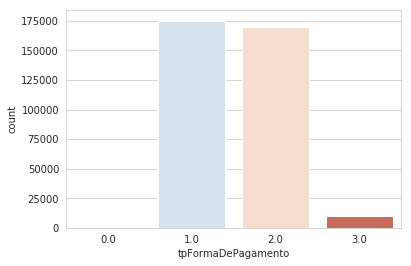

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='tpFormaDePagamento',data=df,palette='RdBu_r')

In [7]:
##

In [6]:
##

Foi feito o cruzamento de dados dos campos 'tpDocumento' e 'tpFormaDePagamento' para que tentasse entender possíveis relações


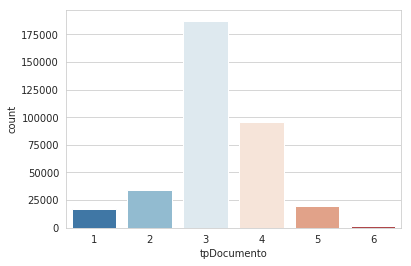

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='tpDocumento',data=df,palette='RdBu_r')

In [28]:
combinations = df.groupby(['tpFormaDePagamento','tpDocumento']).size().reset_index().rename(columns={0:'count'})

In [31]:
print(combinations)

    tpFormaDePagamento  tpDocumento  count
0                  0.0            1      1
1                  0.0            2      5
2                  0.0            3     14
3                  0.0            4     17
4                  0.0            5      1
5                  1.0            1  10548
6                  1.0            2   9933
7                  1.0            3  95550
8                  1.0            4  46509
9                  1.0            5  10998
10                 1.0            6   1622
11                 2.0            1   4926
12                 2.0            2  22266
13                 2.0            3  88643
14                 2.0            4  45890
15                 2.0            5   7608
16                 2.0            6    363
17                 3.0            1   1784
18                 3.0            2   1975
19                 3.0            3   2419
20                 3.0            4   3203
21                 3.0            5    663
22         

Utilizando filtros, foram buscados PRONACs no ver salic, e os ids de comprovantes de pagamento, pois nele os itens orçamentários possuem descritos em textos os tipos de forma de pagamento, e chegou-se a seguinte conclusão:

tpFormaDePagamento = 0 é nulo, não aparece no versalic
tpFormaDePagamento = 1 é cheque
tpFormaDePagamento = 2 é transferência bancária
tpFormaDePagamento = 3 Saque/Dinheiro

In [32]:
subsetDataFrame = df[df['tpFormaDePagamento'] == 0.0]

In [34]:
subsetDataFrame.sort_values('PRONAC')

,IdPRONAC,PRONAC,DataProjeto,idPlanilhaAprovacao,idPlanilhaItem,Item,idSegmento,vlComprovacao,idComprovantePagamento,nrCNPJCPF,nmFornecedor,UF,cdProduto,cdCidade,cdEtapa,proponenteCgcCpf,tpDocumento,tpFormaDePagamento
70508,132451,1012121,2010-12-14 15:04:51.837,18561,1019,Combustível,71,75.00,2784,43627470000192,Auto Posto Pedra Azul Ltda,35,0,355030,4,12418752860,2,0.0
34090,151329,122487,2012-04-12 15:47:09.983,632133,2692,Coordenador do projeto,5F,3000.00,2765,01864504862,JOSÉ VICENTE,35,0,355480,4,01864504862,4,0.0
97631,152038,123184,2012-04-25 14:40:57.047,551964,138,Custo distribuição para bibliotecas,6C,591.00,11559,21960877000102,ROVIGO EMPREENDIMENTOS LTDA - EPP,31,1,310620,2,53316479600,4,0.0
24072,152861,124007,2012-05-14 10:36:59.077,910400,192,Secretária,5E,5742.00,13764,00486398000118,FORMARTE PROJETOS PRODUCAO E ASSESSORIA LTDA,35,0,355030,4,33439092000160,3,0.0
86419,154267,125360,2012-06-20 10:11:23.380,598553,2787,"Spot de até 30""\r\n",11,500.00,6544,80668817000171,Rádio Diplomata de Brusque Ltda - EPP,42,19,420290,3,03752066000126,3,0.0
15440,154267,125360,2012-06-20 10:11:23.380,598547,3235,Assistente administrativo,11,600.00,5904,07198357000175,Vallezen Produções Ltda,42,0,420290,4,03752066000126,3,0.0
4717,158537,129585,2012-11-20 15:55:50.473,758873,32,Solista,32,1527.75,2520,05914539000170,Cooperativa de Trabalho dos Profissionais de M...,28,51,280030,2,10645538000107,3,0.0
6976,171007,1310987,2013-11-21 10:12:24.650,1104651,1044,Coordenador de produção,2J,20000.00,10763,04008366000168,CENTRAL DAS ARTES PRODUÇÕES ARTÍSTICAS LTDA.,33,124,330455,1,04008366000168,3,0.0
80970,160753,131344,2013-02-15 15:01:47.073,817617,2628,Registro videográfico,2J,5000.00,5762,11184594000154,Leonardo Henrique Pereira Branco ME,35,124,355030,2,61011607000161,3,0.0
56220,161227,131818,2013-03-06 10:56:35.320,847973,2136,Pinturas,4B,3000.00,3538,13511341000173,ASSOCIAÇÃO NEWART DE PRESTADORES DE SERVIÇOS A...,33,62,330455,2,31910375000112,3,0.0


Da mesma forma, foram mapeados os tipos de documentos:

tpDocumento = 2 -> Cupom Fiscal;; 

tpDocumento = 4 -> Nota Fiscal/Fatura; 

tpDocumento = 3 -> Guia de Recolhimento; 

tpDocumento = 1 -> Boleto Bancario;

tpDocumento = 5 ->Recibo de Pagamento;

tpDocumento = 6 -> RPA;

In [40]:
subsetDataFrame = df[df['tpFormaDePagamento'] == 3.0]
subsetDataFrame.sort_values('PRONAC')

,IdPRONAC,PRONAC,DataProjeto,idPlanilhaAprovacao,idPlanilhaItem,Item,idSegmento,vlComprovacao,idComprovantePagamento,nrCNPJCPF,nmFornecedor,UF,cdProduto,cdCidade,cdEtapa,proponenteCgcCpf,tpDocumento,tpFormaDePagamento
255244,131687,1011390,2010-11-26 14:17:57.813,25417,1119,Refeição,11,23.00,180990,10780175000112,DISPÃPÃO,41,19,411840,2,05264441000114,3,3.0
255295,131687,1011390,2010-11-26 14:17:57.813,25408,1119,Refeição,11,43.00,181092,01191805000122,CANTINA PAPAFINA,41,19,411915,2,05264441000114,3,3.0
255296,131687,1011390,2010-11-26 14:17:57.813,25408,1119,Refeição,11,19.94,181094,79204558000149,LOJÃO AVENIDA,41,19,411915,2,05264441000114,3,3.0
255297,131687,1011390,2010-11-26 14:17:57.813,25408,1119,Refeição,11,40.00,181097,10901446000140,REI DA FEIJOADA,41,19,411915,2,05264441000114,3,3.0
255298,131687,1011390,2010-11-26 14:17:57.813,25408,1119,Refeição,11,30.50,181099,10901446000140,REI DA FEIJOADA,41,19,411915,2,05264441000114,3,3.0
255299,131687,1011390,2010-11-26 14:17:57.813,25408,1119,Refeição,11,30.00,181100,10901446000140,REI DA FEIJOADA,41,19,411915,2,05264441000114,3,3.0
255300,131687,1011390,2010-11-26 14:17:57.813,25408,1119,Refeição,11,32.50,181102,10901446000140,REI DA FEIJOADA,41,19,411915,2,05264441000114,3,3.0
255301,131687,1011390,2010-11-26 14:17:57.813,25408,1119,Refeição,11,40.00,181103,10901446000140,REI DA FEIJOADA,41,19,411915,2,05264441000114,3,3.0
255302,131687,1011390,2010-11-26 14:17:57.813,25410,1119,Refeição,11,33.50,181935,10901446000140,REI DA FEIJOADA,41,19,412560,2,05264441000114,3,3.0
255303,131687,1011390,2010-11-26 14:17:57.813,25410,1119,Refeição,11,45.50,181936,10901446000140,REI DA FEIJOADA,41,19,412560,2,05264441000114,3,3.0


Utilizando os conhecimentos obtidos, foram mapeados os campos que antes eram inteiros, para texto

In [29]:
new_tpDocumento = {1: "Boleto Bancario", 2: "Cumpom Fiscal", 3: "Guia de Recolhimento",
                   4: "Nota Fiscal/Fatura", 5: "Recibo de Pagamento", 6: "RPA"}
new_tpFormaDePagamento = { 0.0: np.nan, 1.0: "Cheque", 2.0: "Transferência Bancária", 3.0: 'Saque/Dinheiro'}

In [30]:
df["tpDocumento"] = df["tpDocumento"].map(new_tpDocumento)
df["tpFormaDePagamento"] = df["tpFormaDePagamento"].map(new_tpFormaDePagamento)

/home/fabiola/Desktop/salic/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


df.head()

In [44]:
combinations = df.groupby(['tpFormaDePagamento','tpDocumento']).size().reset_index().rename(columns={0:'count'})

In [45]:
print(combinations)

        tpFormaDePagamento           tpDocumento  count
0                   Cheque       Boleto Bancario  10548
1                   Cheque         Cumpom Fiscal   9933
2                   Cheque  Guia de Recolhimento  95550
3                   Cheque    Nota Fiscal/Fatura  46509
4                   Cheque                   RPA   1622
5                   Cheque   Recibo de Pagamento  10998
6           Saque/Dinheiro       Boleto Bancario   1784
7           Saque/Dinheiro         Cumpom Fiscal   1975
8           Saque/Dinheiro  Guia de Recolhimento   2419
9           Saque/Dinheiro    Nota Fiscal/Fatura   3203
10          Saque/Dinheiro                   RPA     69
11          Saque/Dinheiro   Recibo de Pagamento    663
12  Transferência Bancária       Boleto Bancario   4926
13  Transferência Bancária         Cumpom Fiscal  22266
14  Transferência Bancária  Guia de Recolhimento  88643
15  Transferência Bancária    Nota Fiscal/Fatura  45890
16  Transferência Bancária                   RPA

### Comprovantes por código de operação (TED, saque, cheque) 5/5/1 níveis de complexidade

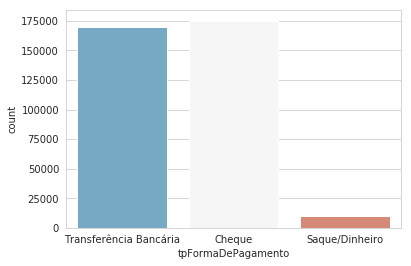

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='tpFormaDePagamento',data=df,palette='RdBu_r')

### Mais de um item orçamentário por comprovante de pagamento

Foi observado que dos 355664 itens orçamentários da planilha, 355478 apresentam comprovantes únicos. APenas 186 são os casos nos quais um item orçamentário está no mesmo comprovante que outro item/outros itens. 

Questiona-se o motivo dos dados estarem apresentados dessa maneira, pois os técnicos responsáveis pela análise financeira apresentaram queixas justamente sobre um comprovante possuir vários itens orçamentários associados, como isso era algo comum e que aumentava a complexidade da análise


In [11]:
 df['idComprovantePagamento'].nunique()

355478

In [50]:
355664 - 355478

186

Foram listados os comprovantes e suas repetições e detalhado o exemplo do 'idComprovantePagamento' de valor 5232 que possue 8 itens. Estes itens são todos do mesmo fornecedor.

In [56]:
 df['idComprovantePagamento'].value_counts()
df[df['idComprovantePagamento'] == 5232]

5232      8
5421      7
5616      7
5252      7
5508      6
5240      6
5409      6
5256      6
1695      5
4909      5
1734      5
1705      5
1737      5
4928      5
5467      5
1692      5
1676      5
1747      4
1694      4
5610      4
6606      4
2736      4
1678      4
1731      4
1691      4
4868      4
1724      4
4888      4
4881      4
1749      4
         ..
91526     1
93575     1
73097     1
66954     1
69003     1
79244     1
75150     1
77199     1
308540    1
298299    1
296250    1
302393    1
288038    1
290087    1
267560    1
269609    1
263466    1
265515    1
277805    1
271662    1
273711    1
316720    1
318769    1
312626    1
314675    1
324916    1
326965    1
320822    1
322871    1
4098      1
Name: idComprovantePagamento, Length: 355478, dtype: int64

In [57]:
df[df['idComprovantePagamento'] == 5232]

,IdPRONAC,PRONAC,DataProjeto,idPlanilhaAprovacao,idPlanilhaItem,Item,idSegmento,vlComprovacao,idComprovantePagamento,nrCNPJCPF,nmFornecedor,UF,cdProduto,cdCidade,cdEtapa,proponenteCgcCpf,tpDocumento,tpFormaDePagamento
21182,162420,132955,2013-04-24 15:16:06.437,916117,3909,Projeto Expográfico,6E,4000.00,5232,11658211000132,Quattro Projetos e Serviços Ltda - ME,35,62,355030,1,08078643000160,Guia de Recolhimento,Transferência Bancária
21183,162420,132955,2013-04-24 15:16:06.437,916121,4512,Painéis modulados,6E,8000.00,5232,11658211000132,Quattro Projetos e Serviços Ltda - ME,35,62,355030,2,08078643000160,Guia de Recolhimento,Transferência Bancária
21189,162420,132955,2013-04-24 15:16:06.437,916113,5250,Elaboração de prestação de contas,6E,1500.00,5232,11658211000132,Quattro Projetos e Serviços Ltda - ME,43,0,431490,4,08078643000160,Guia de Recolhimento,Transferência Bancária
21190,162420,132955,2013-04-24 15:16:06.437,916083,53,Produtor executivo,6E,5000.00,5232,11658211000132,Quattro Projetos e Serviços Ltda - ME,43,1,431490,1,08078643000160,Guia de Recolhimento,Transferência Bancária
21191,162420,132955,2013-04-24 15:16:06.437,916098,109,Editoração Eletrônica,6E,2000.00,5232,11658211000132,Quattro Projetos e Serviços Ltda - ME,35,1,355030,2,08078643000160,Guia de Recolhimento,Transferência Bancária
21192,162420,132955,2013-04-24 15:16:06.437,916100,114,Impressão,6E,30000.00,5232,11658211000132,Quattro Projetos e Serviços Ltda - ME,35,1,355030,2,08078643000160,Guia de Recolhimento,Transferência Bancária
21193,162420,132955,2013-04-24 15:16:06.437,916092,5514,Fotógrafo,6E,3500.00,5232,11658211000132,Quattro Projetos e Serviços Ltda - ME,35,1,355030,2,08078643000160,Guia de Recolhimento,Transferência Bancária
21199,162420,132955,2013-04-24 15:16:06.437,916116,5249,Remuneração para captação de recursos,6E,17000.00,5232,11658211000132,Quattro Projetos e Serviços Ltda - ME,43,0,431490,4,08078643000160,Guia de Recolhimento,Transferência Bancária


In [14]:
 df['idPlanilhaAprovacao'].nunique()

75940

In [18]:
df['idPlanilhaAprovacao'].value_counts()

1956122    1303
1785724     958
1685217     932
2373914     881
1060584     743
1516931     699
1336162     695
1662257     690
1957660     675
2034427     656
1983359     621
1336144     606
1972356     602
1336141     528
1685572     522
1728258     488
1696681     463
1316095     455
1711954     426
2029946     425
958646      424
1430013     415
1096152     407
1671063     398
1982620     395
1745832     389
2104748     383
1982704     382
2005495     366
1336159     363
           ... 
2028449       1
2069389       1
1039236       1
1590135       1
2122611       1
1433367       1
2208841       1
1645660       1
1252636       1
1098855       1
2333964       1
1727906       1
2356481       1
193975        1
1354986       1
1881321       1
1383644       1
1418443       1
1957060       1
1991859       1
2272700       1
2010282       1
982176        1
2227670       1
2067598       1
1559686       1
626136        1
2118773       1
1678810       1
2109434       1
Name: idPlanilhaAprovaca

### Possibilidade: mesmo item orçamentário estar espalhado entre vários comprovantes ser um problema na hora da análise financeira?

In [20]:
df[df['idPlanilhaAprovacao'] == 1956122]

,IdPRONAC,PRONAC,DataProjeto,idPlanilhaAprovacao,idPlanilhaItem,Item,idSegmento,vlComprovacao,idComprovantePagamento,nrCNPJCPF,nmFornecedor,UF,cdProduto,cdCidade,cdEtapa,proponenteCgcCpf,tpFormaDePagamento
27185,206128,163376,2016-09-08 11:17:12.957,1956122,2606,Professor,33,400.00,384946,03717485857,Wilson Roberto Pereira,35,3,355030,2,01891025000195,2.0
27186,206128,163376,2016-09-08 11:17:12.957,1956122,2606,Professor,33,735.00,360323,03717485857,Wilson Roberto Pereira,35,3,355030,2,01891025000195,2.0
27187,206128,163376,2016-09-08 11:17:12.957,1956122,2606,Professor,33,877.00,359921,03717485857,Wilson Roberto Pereira,35,3,355030,2,01891025000195,2.0
27188,206128,163376,2016-09-08 11:17:12.957,1956122,2606,Professor,33,435.00,358311,03717485857,Wilson Roberto Pereira,35,3,355030,2,01891025000195,2.0
27189,206128,163376,2016-09-08 11:17:12.957,1956122,2606,Professor,33,707.00,356807,03717485857,Wilson Roberto Pereira,35,3,355030,2,01891025000195,2.0
27190,206128,163376,2016-09-08 11:17:12.957,1956122,2606,Professor,33,706.00,355721,03717485857,Wilson Roberto Pereira,35,3,355030,2,01891025000195,2.0
27191,206128,163376,2016-09-08 11:17:12.957,1956122,2606,Professor,33,845.00,355088,03717485857,Wilson Roberto Pereira,35,3,355030,2,01891025000195,2.0
27192,206128,163376,2016-09-08 11:17:12.957,1956122,2606,Professor,33,655.00,354224,03717485857,Wilson Roberto Pereira,35,3,355030,2,01891025000195,2.0
27193,206128,163376,2016-09-08 11:17:12.957,1956122,2606,Professor,33,1208.00,305812,03717485857,Wilson Roberto Pereira,35,3,355030,2,01891025000195,2.0
31806,206128,163376,2016-09-08 11:17:12.957,1956122,2606,Professor,33,2171.00,358644,39938004865,Agnaldo Burgo Junior,35,3,355030,2,01891025000195,2.0


In [21]:
df[df['idPlanilhaAprovacao'] == 1785724]

,IdPRONAC,PRONAC,DataProjeto,idPlanilhaAprovacao,idPlanilhaItem,Item,idSegmento,vlComprovacao,idComprovantePagamento,nrCNPJCPF,nmFornecedor,UF,cdProduto,cdCidade,cdEtapa,proponenteCgcCpf,tpFormaDePagamento
21727,199664,159475,2015-10-28 17:57:22.573,1785724,3661,Músico Local,32,600.00,364031,11990733859,MARCUS GEANDRE NAKANO RAMIRO,41,51,411520,2,02464418000185,2.0
21728,199664,159475,2015-10-28 17:57:22.573,1785724,3661,Músico Local,32,600.00,359182,11990733859,MARCUS GEANDRE NAKANO RAMIRO,41,51,411520,2,02464418000185,2.0
21729,199664,159475,2015-10-28 17:57:22.573,1785724,3661,Músico Local,32,600.00,290487,11990733859,MARCUS GEANDRE NAKANO RAMIRO,41,51,411520,2,02464418000185,2.0
29471,199664,159475,2015-10-28 17:57:22.573,1785724,3661,Músico Local,32,960.81,364195,02464418000185,CENTRO UNIVERSITARIO DE MARINGA,41,51,411520,2,02464418000185,2.0
29472,199664,159475,2015-10-28 17:57:22.573,1785724,3661,Músico Local,32,12745.37,364192,02464418000185,CENTRO UNIVERSITARIO DE MARINGA,41,51,411520,2,02464418000185,2.0
29473,199664,159475,2015-10-28 17:57:22.573,1785724,3661,Músico Local,32,6006.32,359849,02464418000185,CENTRO UNIVERSITARIO DE MARINGA,41,51,411520,2,02464418000185,2.0
29474,199664,159475,2015-10-28 17:57:22.573,1785724,3661,Músico Local,32,571.81,359950,02464418000185,CENTRO UNIVERSITARIO DE MARINGA,41,51,411520,2,02464418000185,2.0
29475,199664,159475,2015-10-28 17:57:22.573,1785724,3661,Músico Local,32,13307.68,358421,02464418000185,CENTRO UNIVERSITARIO DE MARINGA,41,51,411520,2,02464418000185,2.0
29476,199664,159475,2015-10-28 17:57:22.573,1785724,3661,Músico Local,32,719.15,294489,02464418000185,CENTRO UNIVERSITARIO DE MARINGA,41,51,411520,2,02464418000185,2.0
29477,199664,159475,2015-10-28 17:57:22.573,1785724,3661,Músico Local,32,13486.54,294388,02464418000185,CENTRO UNIVERSITARIO DE MARINGA,41,51,411520,2,02464418000185,2.0


In [22]:
df3 = data.planilha_orcamentaria

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026756 entries, 0 to 2026755
Data columns (total 25 columns):
idPronac                int64
PRONAC                  object
idPlanilhaAprovacao     int64
Item                    object
idPlanilhaItens         int64
Unidade                 object
QtDias                  int64
QtItem                  float64
nrOcorrencia            object
VlUnitarioSolicitado    object
VlTotalSolicitado       float64
VlUnitarioAprovado      object
VlTotalAprovado         float64
UfItem                  object
MunicipioItem           object
Etapa                   object
idArea                  object
Area                    object
idSegmento              object
Segmento                object
idProduto               int64
Produto                 object
DataProjeto             datetime64[ns]
cdEtapa                 int64
cdCidade                int64
dtypes: datetime64[ns](1), float64(3), int64(7), object(14)
memory usage: 386.6+ MB


In [25]:
df3.head()

,idPronac,PRONAC,idPlanilhaAprovacao,Item,idPlanilhaItens,Unidade,QtDias,QtItem,nrOcorrencia,VlUnitarioSolicitado,...,Etapa,idArea,Area,idSegmento,Segmento,idProduto,Produto,DataProjeto,cdEtapa,cdCidade
0,116420,095195,820073,Revisão de texto,92,Verba,60,0.0,0,444.00,...,3 - Divulgação / Comercialização,5,Patrimônio Cultural,53,Arqueológico,1,Livro,2009-09-03 11:50:05.950,3,330455
1,134098,110895,124745,Produtor musical,1171,Cachê,90,1.0,1,10000.00,...,2 - Produção / Execução,2,Audiovisual,85,Distribuição Cinematográfica,12,DVD,2011-02-04 16:04:01.130,2,261160
2,112836,091695,116482,Estagiário,1164,Mês,63,1.0,3,1500.00,...,1 - Pré-Produção / Preparação,7,Artes Integradas,71,Artes Integradas,10,CD-Rom,2009-05-21 10:48:48.790,1,431490
3,114971,093803,792773,Pinturas,2136,Metro 2,280,5093.0,1,19.13,...,2 - Produção / Execução,5,Patrimônio Cultural,5E,Preservação de Patrimônio Material,69,Bem Imóvel - Restauração / Preservação,2009-07-20 16:40:12.033,2,330455
4,114560,093392,1766347,Pre-fabricados/modulados,2385,Não Informado,0,0.0,0,389.32,...,2 - Produção / Execução,5,Patrimônio Cultural,5E,Preservação de Patrimônio Material,69,Bem Imóvel - Restauração / Preservação,2009-07-08 10:08:59.983,2,292740


In [33]:
df = data.planilha_comprovacao
df = df[['idPlanilhaAprovacao', 'PRONAC', 'idComprovantePagamento', 'idSegmento', 'tpFormaDePagamento']]

In [34]:
df.head()

,idPlanilhaAprovacao,PRONAC,idComprovantePagamento,idSegmento,tpFormaDePagamento
0,2407740,171436,393661,33,2.0
1,2186159,161921,206716,11,2.0
2,2407730,171436,393662,33,2.0
3,2186111,161921,206746,11,2.0
4,2186111,161921,206748,11,2.0


In [35]:
new_tpFormaDePagamento = { 0.0: np.nan, 1.0: "Cheque", 2.0: "Transferência Bancária", 3.0: 'Saque/Dinheiro'}

df["tpFormaDePagamento"] = df["tpFormaDePagamento"].map(new_tpFormaDePagamento)

/home/fabiola/Desktop/salic/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
df.head()

,idPlanilhaAprovacao,PRONAC,idComprovantePagamento,idSegmento,tpFormaDePagamento
0,2407740,171436,393661,33,Transferência Bancária
1,2186159,161921,206716,11,Transferência Bancária
2,2407730,171436,393662,33,Transferência Bancária
3,2186111,161921,206746,11,Transferência Bancária
4,2186111,161921,206748,11,Transferência Bancária


In [63]:
dt = df[['PRONAC', 'idSegmento', 'idComprovantePagamento', 'tpFormaDePagamento']].groupby(['idSegmento', 'PRONAC', 'tpFormaDePagamento', 'idComprovantePagamento']).nunique()

In [64]:
dt.drop(columns=['PRONAC', 'idSegmento', 'tpFormaDePagamento'], inplace=True)
dt.rename(columns={'idComprovantePagamento': 'NumeroComprovantes'}, inplace=True)
dt.head()

NumeroComprovantes
idSegmento PRONAC  tpFormaDePagamento idComprovantePagamento                    
11         1011390 Saque/Dinheiro     180557                                   1
                                      180562                                   1
                                      180568                                   1
                                      180569                                   1
                                      180575                                   1

In [80]:
dt2 = df[['idComprovantePagamento', 'PRONAC']].groupby('idComprovantePagamento').count()


In [111]:
#dt2.drop(columns=['PRONAC', 'tpFormaDePagamento'], inplace=True)
#print(dt2[dt2['PRONAC'] > 1])
oi = dt2[dt2['PRONAC'] > 1].index.values

a = df.loc[df['idComprovantePagamento'].isin(oi)]
b = a.groupby(['PRONAC']).nunique().index.values
print(b)

['113762' '120302' '120620' '120831' '129121' '129151' '129824' '130345'
 '132440' '132673' '132955' '133160' '137701' '138784' '139407' '140114'
 '150427' '153958' '158607']


### São 19 os pronacs que possuem mais de um item orçamentário por comprovante, sendo 74 comprovantes que possuem mais de um item

In [112]:
print(b.size)



19


In [113]:
print(oi.size)

74


In [120]:
qq = a[['tpFormaDePagamento', 'PRONAC']]
qq['pronac_count'] = qq['PRONAC'].value_counts()

/home/fabiola/Desktop/salic/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [123]:
qq.groupby('PRONAC').size()

PRONAC
113762     2
120302     7
120620    97
120831     7
129121     6
129151     3
129824    17
130345     2
132440     2
132673    42
132955    10
133160     3
137701    30
138784    21
139407     2
140114     2
150427     3
153958     2
158607     2
dtype: int64

In [131]:
count_series = qq.groupby(['PRONAC']).size()
new_df = count_series.to_frame(name = 'size').reset_index()
new_df

,PRONAC,size
0,113762,2
1,120302,7
2,120620,97
3,120831,7
4,129121,6
5,129151,3
6,129824,17
7,130345,2
8,132440,2
9,132673,42


In [132]:
df.head()

,idPlanilhaAprovacao,PRONAC,idComprovantePagamento,idSegmento,tpFormaDePagamento
0,2407740,171436,393661,33,Transferência Bancária
1,2186159,161921,206716,11,Transferência Bancária
2,2407730,171436,393662,33,Transferência Bancária
3,2186111,161921,206746,11,Transferência Bancária
4,2186111,161921,206748,11,Transferência Bancária


In [136]:
aaaaaaa = df[df['PRONAC'] == '120620']


In [138]:
print(aaaaaaa['idComprovantePagamento'].value_counts())

1705    5
1695    5
1737    5
1692    5
1734    5
1676    5
2736    4
1724    4
1749    4
1678    4
1694    4
1741    4
1731    4
2735    4
1691    4
1747    4
1696    3
1735    3
1728    3
2043    3
1701    3
1680    3
1750    3
1751    3
1736    3
1690    1
1693    1
1687    1
1685    1
1681    1
1679    1
1697    1
1698    1
1699    1
1700    1
1677    1
1723    1
1702    1
1739    1
2041    1
2040    1
2039    1
1748    1
1744    1
1743    1
1742    1
1740    1
1738    1
2738    1
1733    1
1732    1
1730    1
1729    1
1725    1
2042    1
2742    1
2740    1
1718    1
Name: idComprovantePagamento, dtype: int64
